In [1]:
from meshes.truss_like_mesh import truss_like_cross
from fem import Fem
from structure import SetStructure
from bandgap import BandGap
import numpy as np

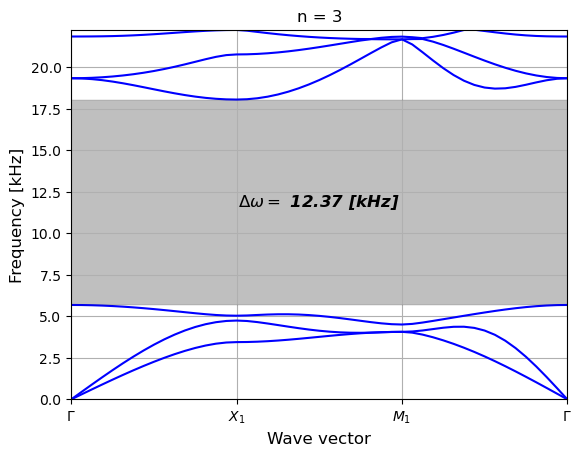

In [2]:
def create_linear_function(a1, a2):
    """Create a linear function between two values."""
    return lambda x: (a2 - a1) * x + a1

mesh, *_ = truss_like_cross()

A_funtion =  create_linear_function(np.pi*4e-6,
                                    np.pi*16e-6)

E_funtion =  create_linear_function(70e9,
                                    411e9)

rho_funtion =  create_linear_function(2.7e3,
                                      19.3e3)
    
fem = Fem(mesh, {'E': lambda x_m: E_funtion(x_m),
                 'rho': lambda x_m: rho_funtion(x_m),
                 'A': lambda x_A: A_funtion(x_A),})

structure = SetStructure(fem,
                        'square',
                        symmetries = {
                            'angles': [0, np.pi/2, np.pi/4],
                            'directions': ["above", "below", "below"]}
                        )


x_m = np.zeros(12)
x_A = np.zeros(12)
mask_x_m = np.where(np.isin(structure.IBZ_elements[0], np.array([1, 2, 4, 8])))[0]
mask_x_A = np.where(np.isin(structure.IBZ_elements[0], np.array([1, 2, 4, 8, 13])))[0]
x_m[mask_x_m] = 1
x_A[mask_x_A] = 1
structure.x[structure.x_map[0]['x_m']] = x_m
structure.x[structure.x_map[0]['x_A']] = x_A
structure.apply_x()


bg = BandGap(structure,
             NINT=60,
             n = 3,
             mode = 'optimize')


bg.plot_bandgap()

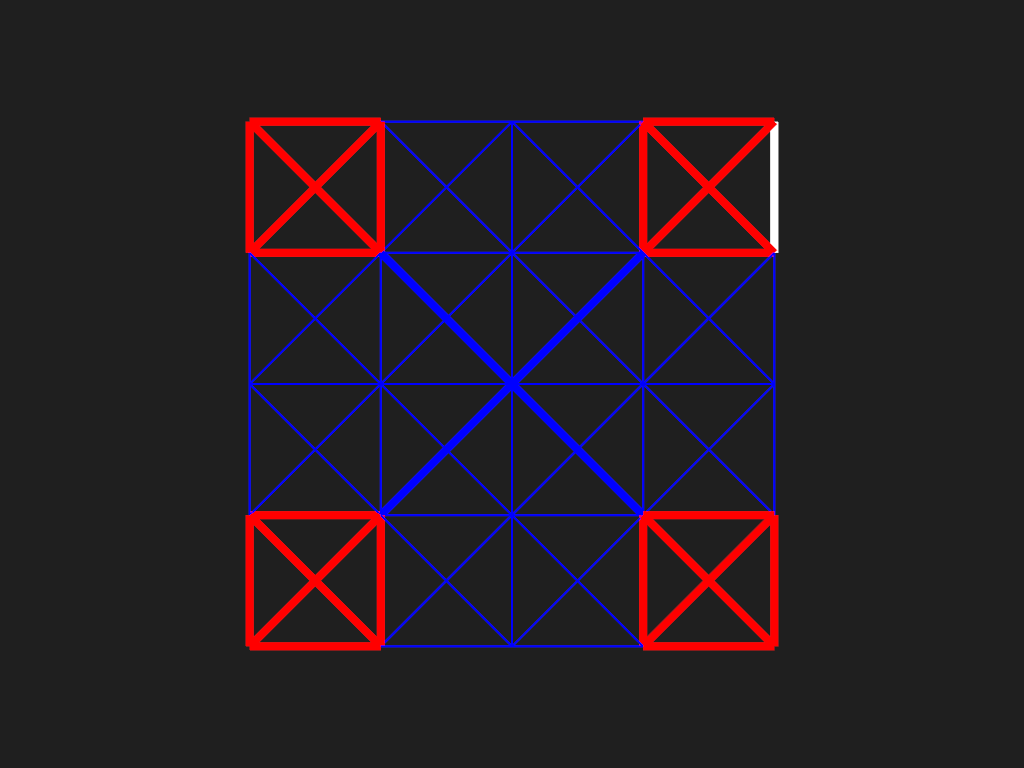

In [3]:
bg.structure.show_structure(highlight_index=1)